## 1. 텐서(Tensor) 데이터 생성

In [57]:
import tensorflow as tf

### 문제1: 상수 텐서를 생성 후 출력하세요.

   - Step01. 5의 값을 가지는 (1,1) shape의 8-bit integer 텐서를 만드세요.
   
   - Step02. 모든 원소의 값이 0인 (3,5) shape의 16-bit integer 텐서를 만드세요.
   
   - Step03. 모든 원소의 값이 1인 (4,3) shape의 8-bit integer 텐서를 만드세요.

In [58]:
def constant_tensors():

  t1 = tf.constant(5, shape=(1,1), dtype=tf.int8)

  t2 = tf.zeros(shape=(3,5), dtype=tf.int16)

  t3 = tf.ones(shape=(4,3), dtype=tf.int8)

  return t1, t2, t3

t1, t2, t3 = constant_tensors()
constant_dict = {'t1':t1, 't2':t2, 't3':t3}

### 문제2: 시퀀스 텐서를 생성하는 'sequence_tensors' 함수를 완성하세요.

   - Step01. 1.5에서 10.5까지 증가하는 3개의 텐서를 만드세요.
   
   - Step02. 2.5에서 20.5까지 증가하는 5개의 텐서를 만드세요.

In [59]:
def sequence_tensors():

  seq_t1 = tf.linspace(1.5, 10.5, 3)

  seq_t2 = tf.linspace(2.5, 20.5, 5)

  return seq_t1, seq_t2

seq_t1,seq_t2 = sequence_tensors()

sequence_dict = {'seq_t1':seq_t1, 'seq_t2':seq_t2}

### 문제3: 변수를 생성하는 'variable_tensor' 함수를 완성하세요.

   - Step01. 값이 100인 변수 텐서를 만드세요.
   
   - Step02. 모든 원소의 값이 1인 (2,2) shape의 변수 텐서를 만드세요.
           이름도 'W'로 지정합니다.
   
   - Step03. 모든 원소의 값이 0인 (2,) shape의 변수 텐서를 만드세요.
           이름도 'b'로 지정합니다.

In [60]:
def variable_tensor():

  var_tensor = tf.Variable(100)
  
  W = tf.Variable(tf.ones((2,2), name='W'))

  b = tf.Variable(tf.zeros((2,), name='b'))

  return var_tensor, W, b

var_tensor, W, b = variable_tensor()

variable_dict = {'var_tensor':var_tensor, 'W':W, 'b':b}

### 결과 확인

In [61]:
for key, value in constant_dict.items():
    print(key, ' :', value.numpy())

print()

for key, value in sequence_dict.items():
    print(key, ' :', value.numpy())

print()

for key, value in variable_dict.items():
    print(key, ' :', value.numpy())

t1  : [[5]]
t2  : [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
t3  : [[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]

seq_t1  : [ 1.5  6.  10.5]
seq_t2  : [ 2.5  7.  11.5 16.  20.5]

var_tensor  : 100
W  : [[1. 1.]
 [1. 1.]]
b  : [0. 0.]


## 2. 텐서(Tensor) 연산

### 문제1: 이항 연산자를 사용해 사칙 연산을 수행하여 각 변수에 저장하세요.

   - Step01. 텐서 'a'와 'b'를 더해 'add'에 저장하세요.
   
   - Step02. 텐서 'a'에서 'b'를 빼 'sub'에 저장하세요.
   
   - Step03. 텐서 'a'와 'b'를 곱해 'mul'에 저장하세요.
   
   - Step04. 텐서 'a'에서 'b'를 나눠 'div'에 저장하세요.

In [62]:
a = tf.constant(10, dtype = tf.int32)
b = tf.constant(3, dtype = tf.int32)

add = tf.constant(a) + tf.constant(b)
sub = tf.constant(a) - tf.constant(b)
mul = tf.constant(a) * tf.constant(b)
div = tf.constant(a) / tf.constant(b)

tensor_dict = {'add':add, 'sub':sub, 'mul':mul, 'div':div}

for key, value in tensor_dict.items():
    print(key, ' :', value.numpy(), '\n')

add  : 13 

sub  : 7 

mul  : 30 

div  : 3.3333333333333335 



## 3. 텐서플로우를 활용하여 선형 회귀 구현하기

In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

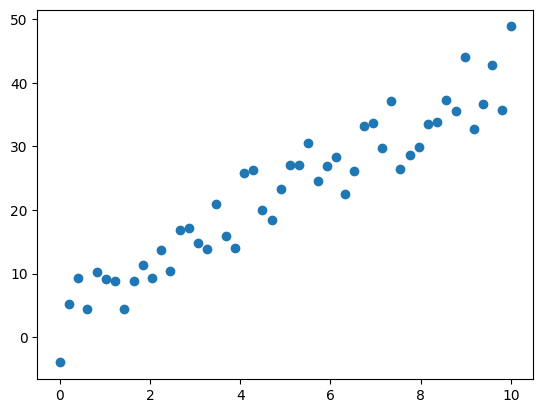

In [64]:
# 데이터 생성
np.random.seed(100)
x_data = np.linspace(0, 10, 50)
y_data = 4 * x_data + np.random.randn(*x_data.shape)*4 + 3

# 데이터 출력
plt.scatter(x_data,y_data)
plt.savefig('data.png')

### 문제1: 선형 회귀 모델의 클래스를 구현합니다.

   - Step01. 가중치 초기값을 1.5의 값을 가진 변수 텐서로 설정하세요.
   
   - Step02. Bias 초기값을 1.5의 값을 가진 변수 텐서로 설정하세요.
   
   - Step03. W, X, b를 사용해 선형 모델을 구현하세요.

In [65]:
class LinearModel:
  def __init__(self):
    # step01. 가중치 초기값을 1.5의 값을 가진 변수 텐서로 설정하세요.
    self.W = tf.Variable(initial_value=(1.5))

    # step02. 편향 초기값을 1.5의 값을 가진 변수 텐서로 설정하세요.
    self.b = tf.Variable(initial_value=(1.5))

  def __call__(self, X, Y):
    # step03. W, X, b를 사용해 선형 모델을 구현하세요.
    Y = self.W*X + self.b
    
    return Y

### 문제2: MSE 값을 계산해 반환하는 손실 함수를 완성합니다.

In [66]:
def loss(y, pred):
    # tf.square(data) : data의 제곱
    # tf.reduce_mean(data) : data의 평균을 구한다(차원을 제거하고 평균을 구함)
    # mse : 오차의 제곱을 평균한 값
    mse = tf.reduce_mean(tf.square(y-pred))
    return mse

### 문제3: gradient descent 방식으로 학습하는 train 함수를 완성합니다.
   - 코드를 보면서 어떤 방식으로 W(가중치)와 b(Bias)이 업데이트 되는지 확인해 보세요.

In [67]:
# gradient descent 방식으로 학습 함수 선언
def train(linear_model, x, y):

  with tf.GradientTape() as t:
    # 현재 오차 계산, 위에서 정의한 loss함수 불러오기
    current_loss = loss(y, linear_model(x, y))

  # learning_rate 값 선언
  learning_rate = 0.01

  # gradient 값 계산
  delta_W, delta_b = t.gradient(current_loss, [linear_model.W, linear_model.b])

  # learning rate와 계산한 gradient 값을 이용하여 업데이트할 파라미터 변화 값 계산
  # learning rate와 gradient의 곱으로 표현
  W_update = learning_rate * delta_W
  b_update = learning_rate * delta_b

  return W_update, b_update

### 결과 확인

Epoch count 0: Loss value: 250.49554443359375
W: 3.2799735069274902, b: 1.7767359018325806
Epoch count 20: Loss value: 14.636449813842773
W: 4.057248115539551, b: 2.0911951065063477
Epoch count 40: Loss value: 14.47819709777832
W: 4.031036376953125, b: 2.2664027214050293
Epoch count 60: Loss value: 14.34890365600586
W: 4.007343769073486, b: 2.424771308898926
Epoch count 80: Loss value: 14.243265151977539
W: 3.9859282970428467, b: 2.5679190158843994


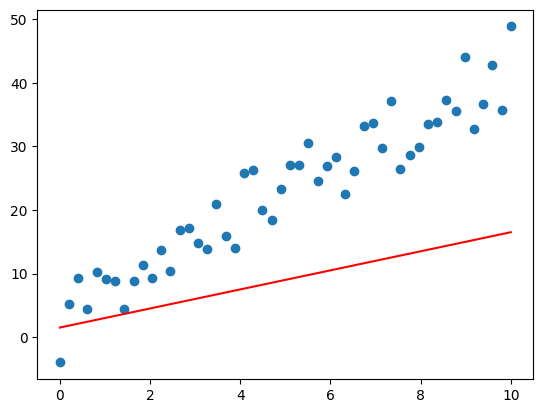

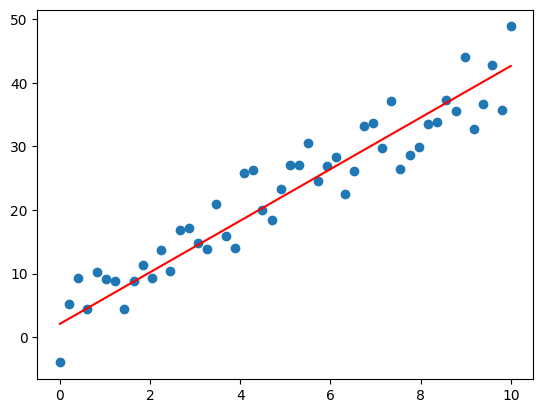

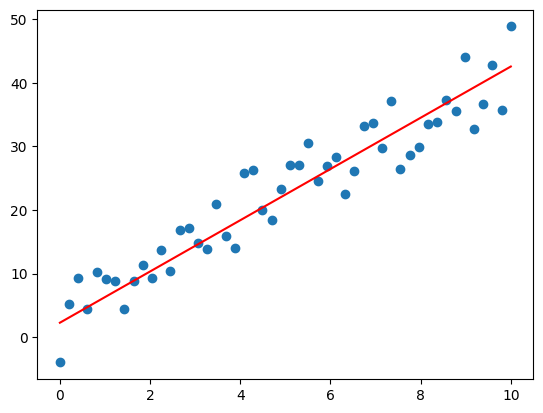

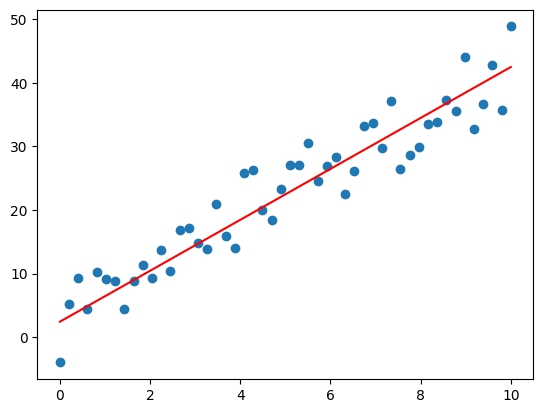

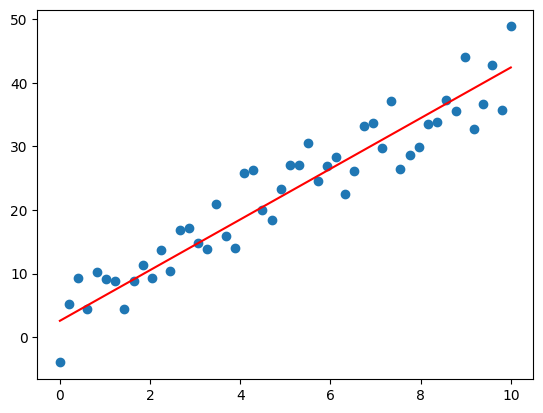

In [68]:
# 선형 모델 클래스 불러오기
linear_model = LinearModel()

# epochs 값 선언
epochs = 100

# epoch 값만큼 모델 학습
for epoch_count in range(epochs):

    # 선형 모델의 예측 값 저장
    y_pred_data=linear_model(x_data, y_data)

    # 예측 값과 실제 데이터 값과의 loss 함수 값 저장
    real_loss = loss(y_data, linear_model(x_data, y_data))

    # 현재의 선형 모델을 사용하여  loss 값을 줄이는 새로운 파라미터로 갱신할 파라미터 변화 값을 계산
    update_W, update_b = train(linear_model, x_data, y_data)

    # 선형 모델의 가중치와 편향을 업데이트합니다.
    linear_model.W.assign_sub(update_W)
    linear_model.b.assign_sub(update_b)

    # 20번 마다 출력 (조건문 변경 가능)
    if (epoch_count%20==0):
        print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")
        print('W: {}, b: {}'.format(linear_model.W.numpy(), linear_model.b.numpy()))

        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.scatter(x_data,y_data)
        ax1.plot(x_data,y_pred_data, color='red')
        plt.savefig('prediction.png')


## 4. 텐서플로우 케라스를 활용하여 비선형회귀 구현하기

케라스란?

텐서플로(TensorFlow)의 케라스(Keras)는 딥러닝 모델을 쉽고 빠르게 구축할 수 있게 도와주는 라이브러리입니다. Keras는 초보자도 쉽게 사용할 수 있는 사용자 친화적인 인터페이스를 제공하여, 복잡한 수학적 계산 과정 없이도 신경망을 설계하고 훈련시킬 수 있게 해줍니다. 간단히 말해, 코딩을 조금만 할 줄 알아도 손쉽게 딥러닝 모델을 만들고 실험해볼 수 있는 도구라고 할 수 있습니다.

In [69]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

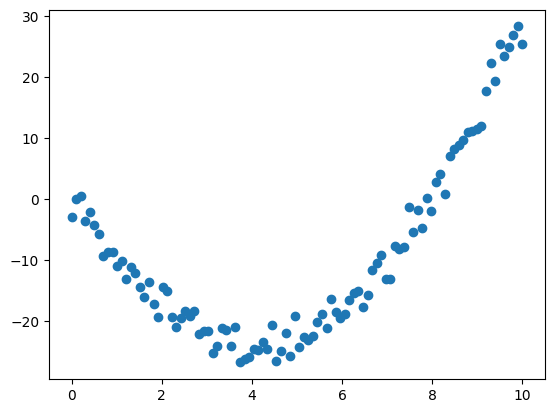

In [83]:
# 비선형 데이터 생성
np.random.seed(100)
tf.random.set_seed(100)
x_data = np.linspace(0, 10, 100)
y_data = 1.5 * x_data**2 -12 * x_data + np.random.randn(*x_data.shape)*2 + 0.5

# 데이터 출력
plt.scatter(x_data,y_data)
plt.savefig('data.png')

### 문제1: 다층 퍼셉트론 모델을 만듭니다.

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 신경망 모델 생성
model = tf.keras.models.Sequential([
  # 입력층 속성에 input_dim=1 추가
  Dense(128, input_dim=1, activation='relu'),
  # Dense(128, input_shape=(1, ), activation='relu'),
  # 은닉층(히든 레이어)
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  # 출력층
  Dense(1, )
  ])

model.summary()

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

### 문제2: 모델 학습 방법을 설정합니다.

In [97]:
# 최적화 모델 설정 loss: mse, optimizer: adam
model.compile(loss='mse', optimizer='adam')

### 문제3: 모델을 학습합니다.

In [93]:
# 모델 학습(에폭수 자유)
model.fit(x_data, y_data, epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 325.7361
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323.9972 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322.6056 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321.3338 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 320.0125 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 318.6909 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 317.5181 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 317.0104 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 317.0601 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 317.8602 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 319.5347 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321.4197 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 325.9565 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 330.2422 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

### 문제4: 학습된 모델을 사용하여 예측값 생성 및 저장합니다.

In [94]:
# 학습된 모델을 사용하여 예측값 생성 및 저장 
predictions = model.predict(x_data)
print(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[ -0.561363  ]
 [ -1.0085995 ]
 [ -1.5001934 ]
 [ -2.4923131 ]
 [ -3.4855602 ]
 [ -4.5604486 ]
 [ -6.014058  ]
 [ -7.4801836 ]
 [ -8.441102  ]
 [ -9.132683  ]
 [ -9.837468  ]
 [-10.569037  ]
 [-11.300609  ]
 [-12.036598  ]
 [-12.80362   ]
 [-13.570643  ]
 [-14.287799  ]
 [-14.915665  ]
 [-15.54656   ]
 [-16.175014  ]
 [-16.794388  ]
 [-17.413761  ]
 [-18.03314   ]
 [-18.650087  ]
 [-19.215603  ]
 [-19.74899   ]
 [-20.252518  ]
 [-20.720507  ]
 [-21.234215  ]
 [-21.747925  ]
 [-22.261631  ]
 [-22.768993  ]
 [-22.955912  ]
 [-23.142836  ]
 [-23.329754  ]
 [-23.516672  ]
 [-23.703598  ]
 [-23.890514  ]
 [-24.07744   ]
 [-24.243547  ]
 [-24.196985  ]
 [-24.150412  ]
 [-24.10384   ]
 [-24.05727   ]
 [-24.010698  ]
 [-23.964136  ]
 [-23.758678  ]
 [-23.50875   ]
 [-23.258818  ]
 [-23.008886  ]
 [-22.758957  ]
 [-22.509022  ]
 [-22.212168  ]
 [-21.569363  ]
 [-20.926544  ]
 [-20.283743  ]
 [-19.714115  ]
 [-19.151628  ]
 [-18.589146  ]
 [-18.026655  ]
 [

### 결과확인

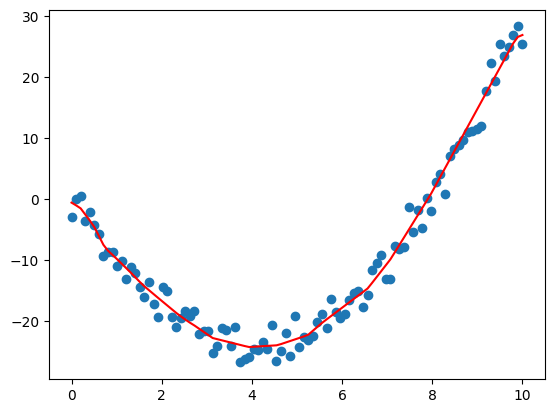

In [95]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_data,y_data)
ax1.plot(x_data,predictions, color='red')
plt.savefig('prediction.png')

## 5. 텐서플로우 케라스를 활용하여 비선형분류 구현하기

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

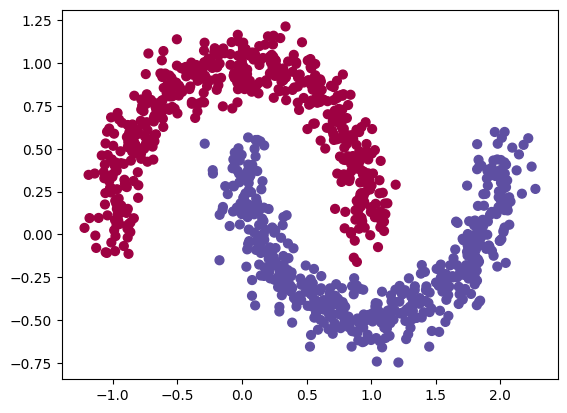

In [ ]:
# 데이터 생성
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# 데이터 출력
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.savefig('data.png')

### 문제0: train, test 데이터 분리

In [102]:
# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### 문제1: 다층 퍼셉트론 모델을 만듭니다.

In [103]:
# 모델 구성 
model = tf.keras.Sequential([
    # 입력층 (2개의 특성을 가짐)
    Dense(128, input_shape=(2, ), activation='relu'),
    # 은닉층
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    # 출력층              
    Dense(1, )    
])

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 문제2: 모델 학습 방법을 설정합니다.

In [104]:
# 모델 컴파일 optimizer, loss, metrics 설정
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

### 문제3: 모델을 학습합니다.

In [114]:
# 모델 훈련 epochs 설정
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.1005e-07 
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.0875e-07 
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.1026e-07 
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 1.0849e-07
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.1635e-07 
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.1276e-07
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 1.1272e-07
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2644e-07 
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.1922e-07 
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.2255e-07 
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.8467e-07 
Epoch 1

### 문제4: 학습된 모델을 평가합니다.

In [115]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print("테스트 세트의 정확도: {:.2f}%".format(accuracy * 100))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9057e-06 
테스트 세트의 정확도: 100.00%


### 결과 확인

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


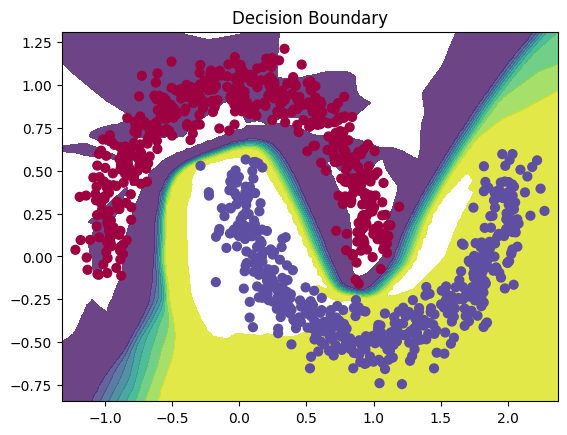

In [116]:
# 결정 경계 시각화
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 10))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# 결정 경계 그리기
plot_decision_boundary(model, X, y)
plt.title('Decision Boundary')
plt.show()